In [5]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

custom_style = {'axes.labelcolor': 'black',
                'xtick.color': 'black',
                'ytick.color': 'black'}
sns.set_style("darkgrid", rc=custom_style)

[Text(0,0,'cluster0'),
 Text(0,0,'cluster1'),
 Text(0,0,'cluster2'),
 Text(0,0,'cluster3')]

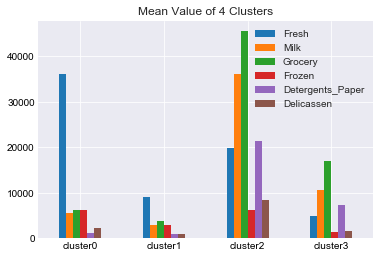

In [36]:
### [scikit-learn でクラスタ分析 (K-means 法) – Python でデータサイエンス](http://pythondatascience.plavox.info/scikit-learn/%E3%82%AF%E3%83%A9%E3%82%B9%E3%82%BF%E5%88%86%E6%9E%90-k-means)
cust_df = pd.read_csv("http://pythondatascience.plavox.info/wp-content/uploads/2016/05/Wholesale_customers_data.csv")
del(cust_df['Channel'])
del(cust_df['Region'])
cust_df

# convert from Pandas dataframe to Numpy Array
cust_array = np.array([cust_df['Fresh'].tolist(),
                      cust_df['Milk'].tolist(),
                      cust_df['Grocery'].tolist(),
                      cust_df['Frozen'].tolist(),
                      cust_df['Detergents_Paper'].tolist(),
                      cust_df['Delicassen'].tolist()
                      ], np.int32)
cust_array = cust_array.T

pred = KMeans(n_clusters=4).fit_predict(cust_array)
pred

cust_df['cluster_id'] = pred
cust_df['cluster_id'].value_counts()
cust_df[cust_df['cluster_id']==0].mean()

clusterinfo = pd.DataFrame()
for i in range(4):
    clusterinfo['cluster' + str(i)] = cust_df[cust_df['cluster_id'] == i].mean()
clusterinfo = clusterinfo.drop('cluster_id')

my_plot = clusterinfo.T.plot(kind='bar', stacked=False, title="Mean Value of 4 Clusters")
my_plot.set_xticklabels(my_plot.xaxis.get_majorticklabels(), rotation=0)

TypeError: scatter() missing 1 required positional argument: 'y'